### Measuring Model Performance

- Computing Accuracy
- ROC and AUC
- Confusion Matrix
- Cross Validation and regularization

In [1]:
import pandas as pd
df = pd.read_csv("../data/car_insurance.csv")

In [2]:
df.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0


In [3]:
pred_vars = ['policy_tenure','age_of_car','age_of_policyholder']
X = df[pred_vars].values
y = df['is_claim'].values

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
reg = LogisticRegression()

In [6]:
m = reg.fit(X_train,y_train)

### Getting predictions and computing performance metrics

In [7]:
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix

#### Confusion Matrix

In [8]:
y_train.mean()

0.06368271712926418

In [9]:
prob_test = m.predict_proba(X_test)
y_pred_50 = (prob_test[:,1]>0.5).astype('int')
y_pred_6 = (prob_test[:,1]>0.06).astype('int')

In [10]:
confusion_matrix(y_test,y_pred_50)

array([[10956,     0],
       [  763,     0]], dtype=int64)

#### Interpretation

- 10955 belong to class 0 and predicted in class 0
- 0 belong to class 0 and predicted in class 1
- 764 belong to class 1 and predicted in class 0 (Missclassified)
- 0 belong to class 1 and predicted in class 1

In [11]:
confusion_matrix(y_test,y_pred_6)

array([[5644, 5312],
       [ 274,  489]], dtype=int64)

#### Interpretation

- 5588 belong to class 0 and predicted in class 0
- 5367 belong to class 0 and predicted in class 1 (Missclassified)
- 294 belong to class 1 and predicted in class 0 (Missclassified)
- 470 belong to class 1 and predicted in class 1

#### ROC Curve

In [12]:
fpr,tpr,thr=roc_curve(y_test,prob_test[:,1])

In [13]:
import matplotlib.pyplot as plt

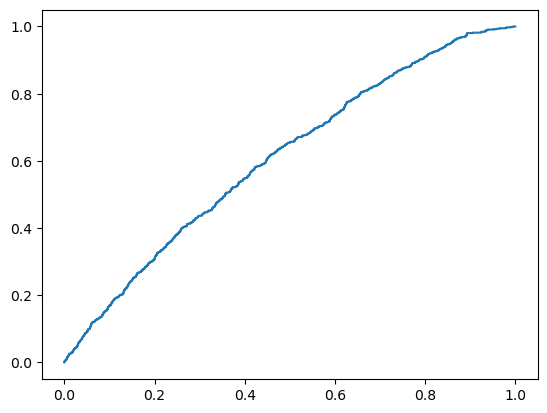

In [14]:
plt.plot(fpr,tpr,"-")

#### AUC Score

In [15]:
roc_auc_score(y_test,prob_test[:,1])

0.6090993307197574

### Regularization in Logistic Regression

Just like in linear regression setting one can use regularization in logistic regression as well.

**L1 Penalty: Lasso**

$Logistic Cost + \lambda\sum|x_i|$

In sklearn instead of Lambda we use inverse of regularization strength known as C.

$C = \frac{1}{\lambda}$

$Logistic Cost +\frac{1}{C}\sum|x_i|$

Higher the value of C lower is impact of the regularization term


**L2 Penalty: Ridge**

$Logistic Cost + \lambda\sum x^2_i$

In sklearn instead of Lambda we use inverse of regularization strength known as C.

$C = \frac{1}{\lambda}$

$Logistic Cost +\frac{1}{C}\sum x^2_i$

Higher the value of C lower is impact of the regularization term


In [16]:
### Lasso Regression
from sklearn.model_selection import GridSearchCV
import numpy as np
c_grid = np.arange(1,20,1)
reg = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"),
                   param_grid={'C':c_grid},cv=3)

In [17]:
m = reg.fit(X_train,y_train)

In [18]:
m.best_params_

{'C': 1}

In [19]:
m.best_estimator_.intercept_

array([-3.19943974])

In [20]:
m.best_estimator_.coef_

array([[ 0.84694317, -3.04842541,  0.31008155]])

In [21]:
### Ridge Regression
reg = GridSearchCV(LogisticRegression(penalty="l2",solver="liblinear"),
                   param_grid={'C':c_grid},cv=3)

In [22]:
m = reg.fit(X_train,y_train)

In [23]:
m.best_params_

{'C': 1}

In [24]:
m.best_estimator_.intercept_

array([-3.20657679])

In [25]:
m.best_estimator_.coef_

array([[ 0.83785403, -2.81972704,  0.30947497]])